<a href="https://colab.research.google.com/github/subir2210/CSDS-AIML/blob/master/CODE/Indian%20AI%20-%20Data%20Preprocessing/lab/09-Feature%20Scaling-Standardization%20%26%20Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This source code created by IndianAIProduction.com team
https://indianaiproduction.com/feature-scaling-standardization-normalization

Video on 
Standardization & Normalization in Detail in Hindi: https://youtu.be/pXpZoRIQSL4
Feature Scaling Explain in Detail in Hindi: https://youtu.be/85je4aCdYcE
        
for video tutorial visit our youtube channel
www.youtube.com\IndianAIProduction

# Feature Scaling
## Standardization & Normalization

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
num = df.select_dtypes('number')
num.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
for i in num:
    a = df[i].isna().sum()
    print(i,'=',a)


survived = 0
pclass = 0
age = 177
sibsp = 0
parch = 0
fare = 0


In [ ]:
df.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

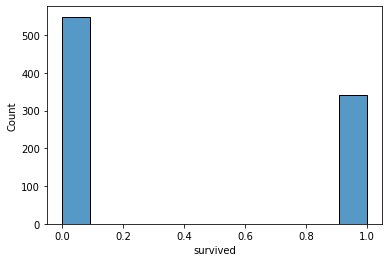

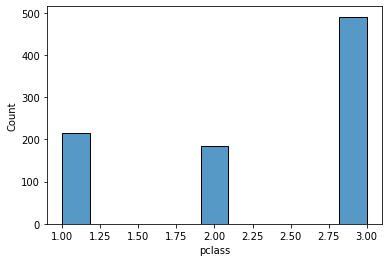

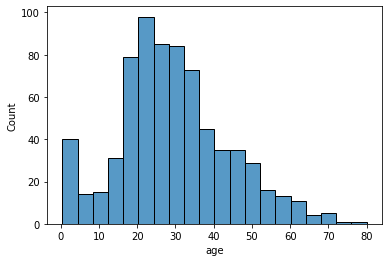

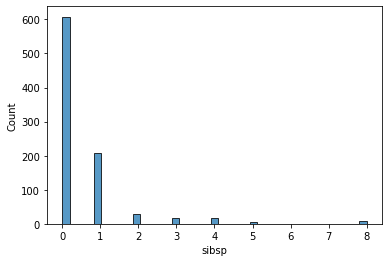

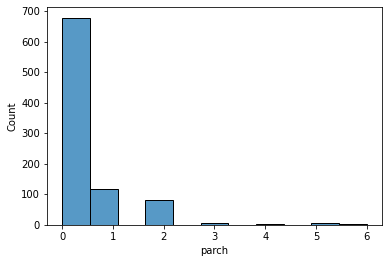

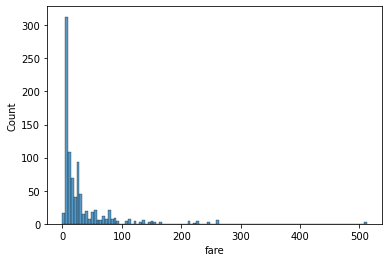

In [ ]:
for j in num:
    plt.show()
    sns.histplot(data=num[j])

In [ ]:
num1 = num.fillna(num.mean())

In [ ]:
num1.age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
X = num1.drop("survived", axis = 1)
y = num1["survived"]
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (891, 5)
Shape of y =  (891,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
print('shape of X_train = ',X_train.shape)
print('shape of X_test = ',X_test.shape)
print('shape of y_train = ',y_train.shape)
print('shape of y_test = ',y_test.shape)

shape of X_train =  (712, 5)
shape of X_test =  (179, 5)
shape of y_train =  (712,)
shape of y_test =  (179,)


In [ ]:
mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train_mms = mmc.transform(X_train)
X_test_mms = mmc.transform(X_test)

In [ ]:
X_train_mmc

array([[1.        , 0.33408898, 0.        , 0.        , 0.01854277],
       [1.        , 0.78039105, 0.        , 0.        , 0.01571255],
       [1.        , 0.14990082, 0.        , 0.        , 0.03667076],
       ...,
       [1.        , 0.67412865, 0.125     , 0.6       , 0.06709553],
       [1.        , 0.4148359 , 0.375     , 0.2       , 0.04970769],
       [1.        , 0.39784642, 0.        , 0.        , 0.01411046]])

In [ ]:
stds = StandardScaler()
stds.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train_stds = stds.transform(X_train)
X_test_stds = stds.transform(X_test)

In [ ]:
X_train_stds

array([[ 0.8220055 , -0.42751304, -0.48020963, -0.49198545, -0.4496767 ],
       [ 0.8220055 ,  1.997125  , -0.48020963, -0.49198545, -0.47792845],
       [ 0.8220055 , -1.42815732, -0.48020963, -0.49198545, -0.26871934],
       ...,
       [ 0.8220055 ,  1.41983023,  0.39648077,  3.27461284,  0.03498701],
       [ 0.8220055 ,  0.01116307,  2.14986159,  0.76354731, -0.13858202],
       [ 0.8220055 , -0.08113618, -0.48020963, -0.49198545, -0.49392089]])

In [ ]:
X_train_stds = pd.DataFrame(X_train_stds,columns=['pclass', 'age', 'sibsp', 'parch', 'fare'])

In [ ]:
X_train_stds.describe().round(2)

,pclass,age,sibsp,parch,fare
count,712.00,712.00,712.00,712.00,712.00
mean,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.55,-2.24,-0.48,-0.49,-0.63
25%,-0.66,-0.58,-0.48,-0.49,-0.48
50%,0.82,0.01,-0.48,-0.49,-0.35
75%,0.82,0.42,0.40,-0.49,-0.03
max,0.82,3.19,6.53,5.79,9.35


In [ ]:
X_train_mms = pd.DataFrame(X_train_mms, columns=['pclass', 'age', 'sibsp', 'parch', 'fare'])

In [ ]:
X_train_mms.describe().round(2)

,pclass,age,sibsp,parch,fare
count,712.00,712.00,712.00,712.00,712.00
mean,0.65,0.41,0.07,0.08,0.06
std,0.42,0.18,0.14,0.16,0.10
min,0.00,0.00,0.00,0.00,0.00
25%,0.38,0.31,0.00,0.00,0.02
50%,1.00,0.41,0.00,0.00,0.03
75%,1.00,0.49,0.12,0.00,0.06
max,1.00,1.00,1.00,1.00,1.00
